In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def visualize_graph(G):

    # SET LAYOUT
    pos = nx.spring_layout(G, k=1, iterations=20)

    # GET NODE INFO
    in_degrees = dict(G.in_degree())

    # SET NODE SIZING
    node_sizes = [in_degrees[node]*30 for node in G.nodes()]

    # DRAW NETWORK
    nx.draw(G,
        node_size=node_sizes,
        pos=pos
    )


def quick_summary(G):

    # PRINT NUMBER OF NODES
    print(f"Number of nodes: {len(G.nodes())}")

    # GET IN DEGREE STATS
    node_in_degrees = dict(G.in_degree(weight="weight"))
    in_degree_list = list(node_in_degrees.values())

    # PLOT IN DEGREE HISTOGRAM
    sns.histplot(in_degree_list, bins=20)
    plt.show(); plt.clf()

    # PRINT TOP SURFERS
    sorted_items = sorted(node_in_degrees.items(), key=lambda item: item[1], reverse=True)
    sorted_surfers = dict(sorted_items)
    count = 1
    for key, value in sorted_surfers.items():
        print(f"{key}: {value}")
        count += 1
        if count >= 5:
            break

## In degreee distributions

---------------------------------------------
EVENT: MARGARET-RIVER_RESULTS
Number of nodes: 105


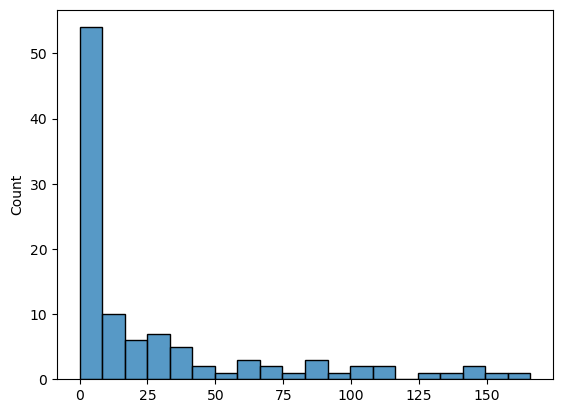

Julian Wilson: 166
Jordy Smith: 150
John John Florence: 144
Kolohe Andino: 143
---------------------------------------------
EVENT: QUIKSILVER-PRO-GOLD-COAST_RESULTS
Number of nodes: 131


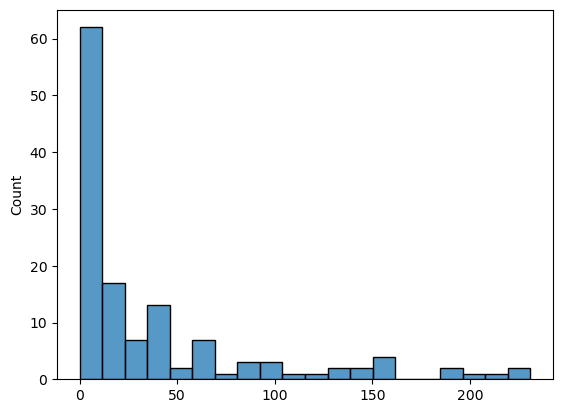

Joel Parkinson: 231
Adriano de Souza: 229
Taj Burrow: 209
Jordy Smith: 205
---------------------------------------------
EVENT: TEAHUPOO_RESULTS
Number of nodes: 131


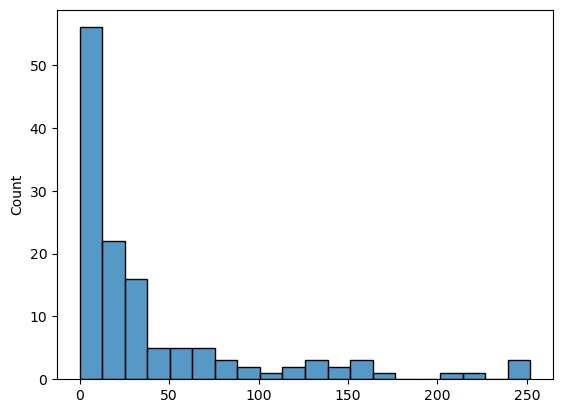

Owen Wright: 252
Gabriel Medina: 249
Jeremy Flores: 241
Kelly Slater: 224
---------------------------------------------
EVENT: BILLABONG-PIPE-MASTERS_RESULTS
Number of nodes: 131


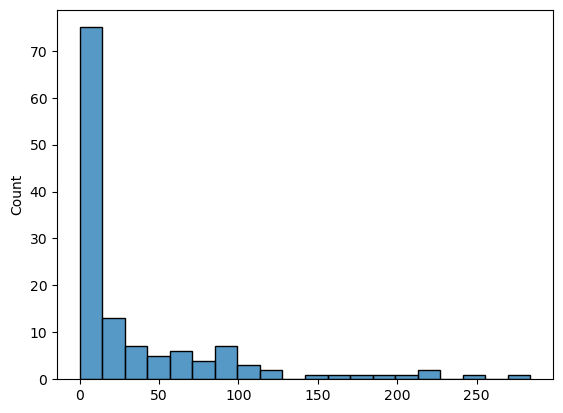

Kelly Slater: 284
Gabriel Medina: 245
Joel Parkinson: 220
John John Florence: 220
---------------------------------------------
EVENT: FIJI_RESULTS
Number of nodes: 90


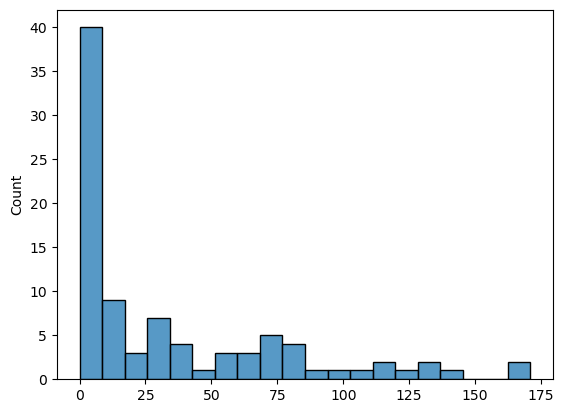

Kelly Slater: 171
Mick Fanning: 163
Joel Parkinson: 139
Gabriel Medina: 133
---------------------------------------------
EVENT: J-BAY_RESULTS
Number of nodes: 130


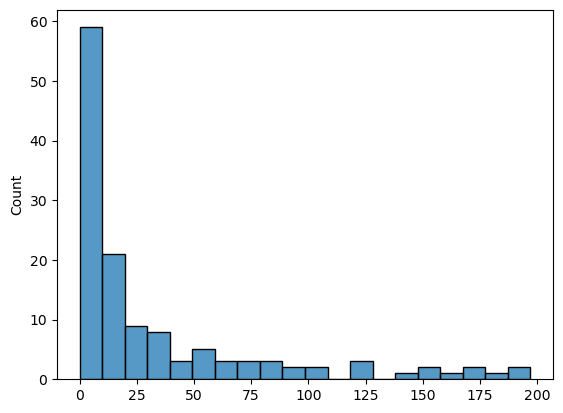

Jordy Smith: 197
Mick Fanning: 194
Gabriel Medina: 179
Adriano de Souza: 170
---------------------------------------------
EVENT: RIO_RESULTS
Number of nodes: 116


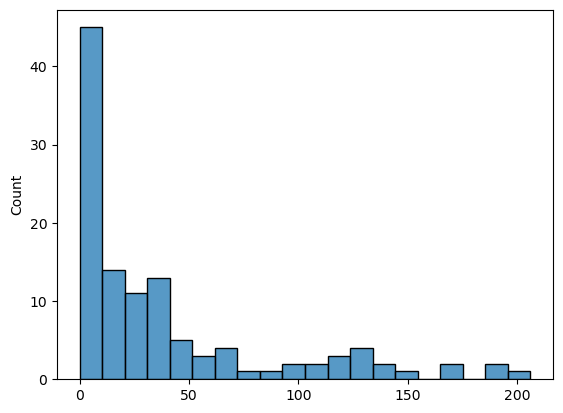

Adriano de Souza: 206
Jordy Smith: 190
Filipe Toledo: 186
John John Florence: 175
---------------------------------------------
EVENT: PORTUGAL_RESULTS
Number of nodes: 131


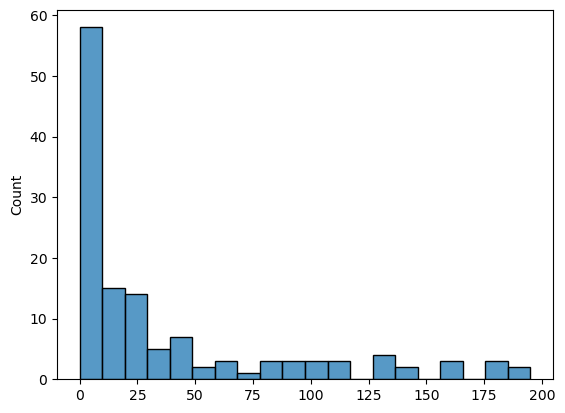

Jordy Smith: 195
Michel Bourez: 194
Julian Wilson: 185
Gabriel Medina: 183
---------------------------------------------
EVENT: BALI_RESULTS
Number of nodes: 83


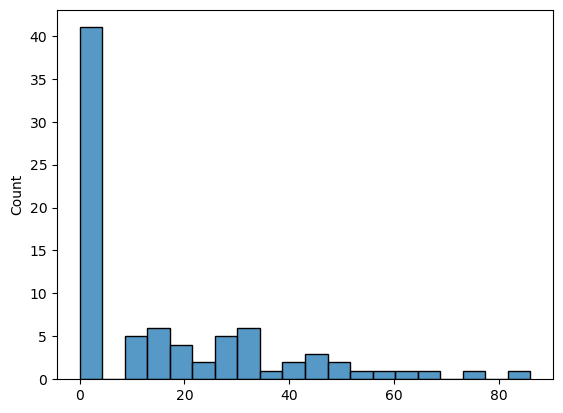

Michel Bourez: 86
Jeremy Flores: 74
Filipe Toledo: 68
Adrian Buchan: 64
---------------------------------------------
EVENT: QUIKSILVER-PRO-FRANCE_RESULTS
Number of nodes: 131


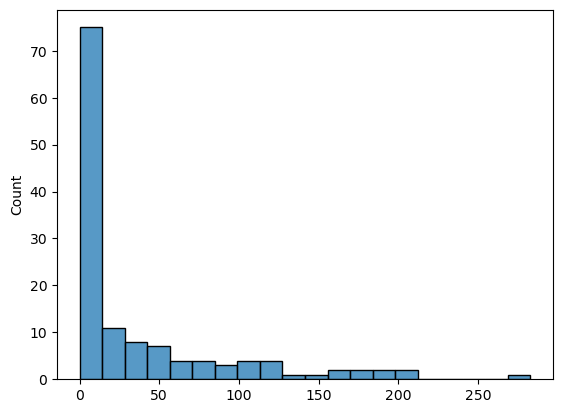

Gabriel Medina: 283
Julian Wilson: 203
Kolohe Andino: 202
John John Florence: 188
---------------------------------------------
EVENT: OVERALL_RESULTS
Number of nodes: 131


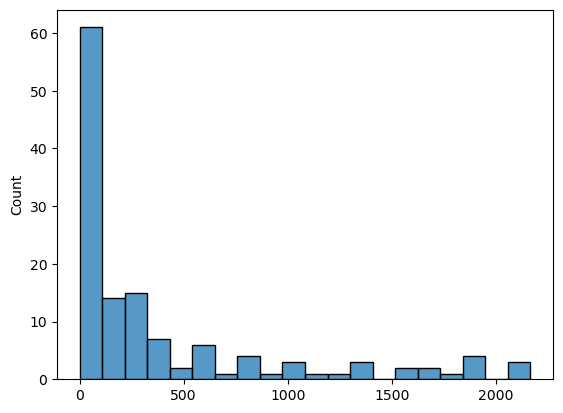

Kelly Slater: 2165
Jordy Smith: 2165
Gabriel Medina: 2138
Adriano de Souza: 1932
---------------------------------------------
EVENT: TRESTLES_RESULTS
Number of nodes: 111


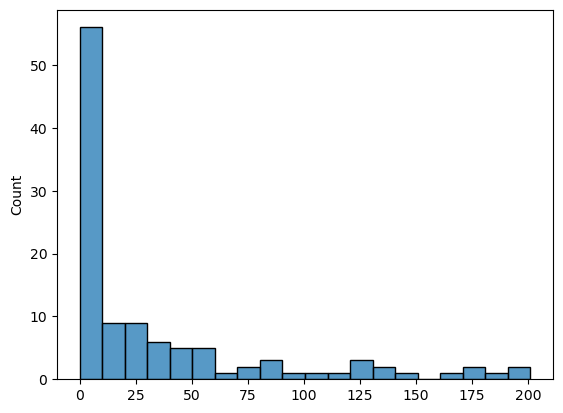

Mick Fanning: 201
Kelly Slater: 198
Jordy Smith: 188
Adriano de Souza: 180
---------------------------------------------
EVENT: RIP-CURL-PRO-BELLS-BEACH_RESULTS
Number of nodes: 131


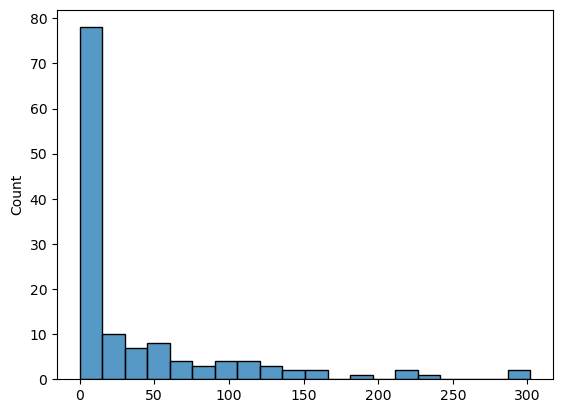

Mick Fanning: 302
Jordy Smith: 292
Adriano de Souza: 240
Kelly Slater: 222


<Figure size 640x480 with 0 Axes>

In [3]:
network_files = os.listdir("../data/networks")

for file in network_files:

    event_name = file.split("_network")[0]
    print("---------------------------------------------")
    print(f"EVENT: {event_name.upper()}")

    net = nx.read_gml(f"../data/networks/{file}")

    quick_summary(net)